In [1]:
#코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 21.9 MB/s eta 0:00:00


In [10]:
pip install wordcloud matplotlib konlpy

In [11]:
!apt-get update -y
!apt-get install -y fonts-nanum

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 엑셀 파일 경로 지정
file_path = '/content/drive/MyDrive/DSL-1/자치구별 뉴스 크롤링/강남구 놀거리.csv'

# 데이터 불러오기
news_df = pd.read_csv(file_path)

# 형태소 분석기 초기화
okt = Okt()

# 뉴스 제목을 하나의 텍스트로 합치기
corpus = ' '.join(news_df['title'])

# 명사만 추출하여 새로운 텍스트 만들기
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

# 명사 추출한 결과로 새로운 텍스트 생성
corpus_nouns = extract_nouns(corpus)

# TF-IDF 벡터라이저 생성
vectorizer = TfidfVectorizer(stop_words='english', max_features=300)  # 상위 10개 키워드 추출
tfidf_matrix = vectorizer.fit_transform([corpus_nouns])

# 키워드와 TF-IDF 점수 출력
feature_names = vectorizer.get_feature_names_out()
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {tfidf_matrix[0, i]:.4f}")

가게: 0.0062
가격: 0.0093
가기: 0.0042
가능: 0.0257
가로수길: 0.0760
감성: 0.0124
강남: 0.3045
강남구: 0.2753
강남구청역: 0.0057
강남대로: 0.0639
강남역: 0.1661
개수: 0.2666
갤러리: 0.0063
갤러리아: 0.0038
거리: 0.5233
건물: 0.0134
게임: 0.0227
겨울: 0.0073
경성: 0.0043
고민: 0.0042
고양이: 0.0117
골프: 0.0040
공간: 0.0189
공연: 0.0043
공원: 0.0160
관람: 0.0042
구경: 0.0095
구매: 0.0042
구청: 0.0045
그림: 0.0043
근처: 0.0200
기간: 0.0165
기본: 0.0092
나이스: 0.0055
남부: 0.0037
내부: 0.0068
넘버: 0.0093
네이버: 0.0083
노트: 0.0072
논현: 0.0154
논현동: 0.0050
논현로: 0.0070
놀숲: 0.0067
다음: 0.0038
다이스: 0.0137
단체: 0.0092
대형: 0.0057
더박스: 0.0050
더홀릭: 0.0065
데블: 0.0058
데이트: 0.1708
도보: 0.0197
도산: 0.0546
도산대로: 0.0154
도서관: 0.0499
드로잉: 0.0085
디저트: 0.0067
디즈니: 0.0052
라스트: 0.0068
라운드: 0.0045
라운지: 0.0043
러너: 0.0095
레드: 0.0144
레이스: 0.0050
로데오: 0.0514
로데오거리: 0.0062
루팡: 0.0119
리뷰: 0.0042
마감: 0.0055
마당: 0.0499
마켓: 0.0053
만들기: 0.0058
만화카페: 0.0068
맛집: 0.0432
매일: 0.0644
매장: 0.0192
매직: 0.0083
메가박스: 0.0078
메뉴: 0.0043
메타: 0.0043
명소: 0.0037
모꼬지: 0.0092
모두: 0.0043
모임: 0.0055
모카: 0.0040
몬스터: 0.0082
무료: 0.0180
무

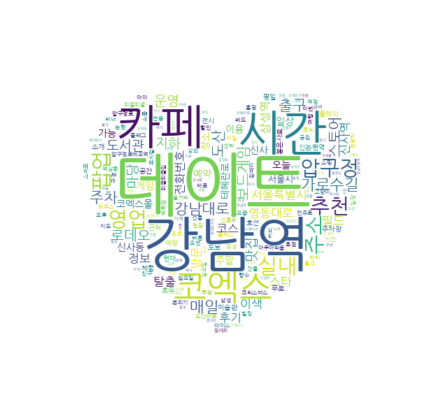

In [17]:
# 사용자가 삭제할 키워드 입력 (예시: "강남", "서울")
keywords_to_remove = ["강남", "서울","거리","강남구","사진","위치","개수"]  # 삭제할 키워드 리스트

# 삭제할 키워드를 word_frequencies에서 제거
for keyword in keywords_to_remove:
    if keyword in word_frequencies:
        del word_frequencies[keyword]

# 서울 지도 모양 이미지 불러오기 (흑백 이미지)
mask_image = np.array(Image.open("/content/drive/MyDrive/DSL-1/Web Crawling + Visualization/heart_image.jpg"))

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",  # 한글 폰트 경로
    background_color="white",
    mask=mask_image,
    width=1800, height=1400,
    max_font_size=100,    # 최대 글자 크기
    min_font_size=1,     # 최소 글자 크기
    relative_scaling=0    # 빈도에 따른 글자 크기 차이를 더 크게 함
).generate_from_frequencies(word_frequencies)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 키워드 데이터 (키워드: 빈도)
word_frequencies = {
    "맛집": 50,
    "카페": 30,
    "노원구": 20,
    "서울": 40,
    "음식": 25,
    "커피": 35,
    "분위기": 15,
    "서지몽":1666,
    "기영균":55,
    "돔돔":855,
    "워드":841,
    "클라우드":612,
    "이동환":598,
    "영더스틴":576,
    "코딩":542,
    "장인":487,
    "블로그":412,
    "방문자":401,
    "댓글":397,
    "롤":391,
    "칼바람":308,
    "나락":284,
    "환영":255,
    "자바":231,
    "장고":175,
    "자바스크립트":152,
    "스프링":109,
    "부트":71,
    "스타벅스":68,
    "제주말차":59,
    "프라푸치노":21,
    "먹고싶다":19,
    "양은실":6,
    "꿀잼":2
}

# 서울 지도 모양 이미지 불러오기 (흑백 이미지)
mask_image = np.array(Image.open("/content/drive/MyDrive/DSL-1/Web Crawling + Visualization/heart_image.jpg"))

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",  # 한글 폰트 경로
    background_color="white",
    mask=mask_image,
    width=1800, height=1400,
    max_font_size=100,    # 최대 글자 크기
    min_font_size=1,     # 최소 글자 크기
    relative_scaling=0    # 빈도에 따른 글자 크기 차이를 더 크게 함
).generate_from_frequencies(word_frequencies)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 엑셀 파일 경로 지정
file_path = '/content/drive/MyDrive/DSL-1/자치구별 뉴스 크롤링/강남구 놀거리.csv'

# 데이터 불러오기
news_df = pd.read_csv(file_path)

# 형태소 분석기 초기화
okt = Okt()

# 뉴스 제목과 본문 합치기
corpus = news_df['title']

# 명사만 추출하여 새로운 텍스트 만들기
def extract_nouns(text):
    return ' '.join(okt.nouns(text))

# 명사 추출한 결과로 새로운 텍스트 생성
corpus_nouns = corpus.apply(extract_nouns)

# TF-IDF 벡터라이저 생성
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)  # 상위 10개 키워드 추출
tfidf_matrix = vectorizer.fit_transform(corpus_nouns)

# 키워드와 TF-IDF 점수 출력
feature_names = vectorizer.get_feature_names_out()
for idx, doc in enumerate(tfidf_matrix.toarray()):
    print(f"뉴스 {idx+1}의 주요 키워드:")
    for i in doc.argsort()[-10:][::-1]:  # 상위 10개 단어 출력
        print(f"{feature_names[i]}: {doc[i]:.4f}")
    print("\n")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
강남: 0.3343
올해: 0.3167
강남구: 0.0420
사업: 0.0000
대표: 0.0000
거래: 0.0000


뉴스 1066의 주요 키워드:
강남구: 0.8020
강남: 0.5315
서울: 0.2725
지역: 0.0000
올해: 0.0000
아파트: 0.0000
사업: 0.0000
부동산: 0.0000
대표: 0.0000
거래: 0.0000


뉴스 1067의 주요 키워드:
지역: 0.6426
올해: 0.6105
서울: 0.3305
강남구: 0.3242
아파트: 0.0000
사업: 0.0000
부동산: 0.0000
대표: 0.0000
거래: 0.0000
강남: 0.0000


뉴스 1068의 주요 키워드:
서울: 0.8978
강남구: 0.4403
지역: 0.0000
올해: 0.0000
아파트: 0.0000
사업: 0.0000
부동산: 0.0000
대표: 0.0000
거래: 0.0000
강남: 0.0000


뉴스 1069의 주요 키워드:
대표: 0.7095
사업: 0.5373
서울: 0.3305
강남구: 0.2593
지역: 0.1285
올해: 0.1221
아파트: 0.0000
부동산: 0.0000
거래: 0.0000
강남: 0.0000


뉴스 1070의 주요 키워드:
서울: 0.8978
강남구: 0.4403
지역: 0.0000
올해: 0.0000
아파트: 0.0000
사업: 0.0000
부동산: 0.0000
대표: 0.0000
거래: 0.0000
강남: 0.0000


뉴스 1071의 주요 키워드:
부동산: 0.6051
아파트: 0.5914
거래: 0.4051
서울: 0.2702
지역: 0.2102
강남구: 0.0530
올해: 0.0000
사업: 0.0000
대표: 0.0000
강남: 0.0000


뉴스 1072의 주요 키워드:
올해: 0.7461
서울: 0.5385
대표: 0.2891
강남구: 0.2641
지역: 0.0000
아파트: 0.0000
사업: 0.0000
부동산: 0.